In [1]:
import anchor

In [22]:
from skimage.segmentation import quickshift,mark_boundaries, slic, felzenszwalb
import skimage
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def transform_img_fast(path):
    img = skimage.io.imread(path)
    if len(img.shape) != 3:
        img = skimage.color.gray2rgb(img)
    short_egde = min(img.shape[:2])
    yy = int((img.shape[0] - short_egde) / 2)
    xx = int((img.shape[1] - short_egde) / 2)
    crop_img = img[yy: yy + short_egde, xx: xx + short_egde]
    return (skimage.transform.resize(crop_img, (256, 256)) - 0.5) * 2

In [14]:
def ShowImageNoAxis(image, boundaries=None, save=None):
    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    if boundaries is not None:
        ax.imshow(mark_boundaries(image / 2 + 0.5, boundaries))
    else:
        ax.imshow(image / 2 + .5)
    if save is not None:
        plt.savefig(save)
    plt.show()


In [18]:
image = transform_img_fast('dog.png')
segments = quickshift(image, kernel_size=4, max_dist=200, ratio=0.2)

/home/kurtis/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kurtis/.local/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


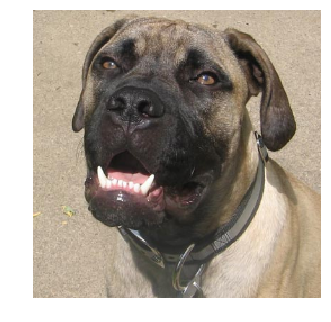

In [17]:
ShowImageNoAxis(image)

In [29]:
exp = {}
exp['feature'] =  [1, 2, 7, 8, 9, 11, 16, 17, 24, 25, 28, 29, 30, 34, 36, 39, 40, 52]
# exp['feature'] = [1, 2, 7, 8, 9, 11, 17, 25, 29, 30, 34, 36, 40, 52]
temp = np.ones(image.shape)
mask = np.zeros(segments.shape)
for f in exp['feature']:
    mask[segments == f] = 1
temp[mask] = image[mask].copy()
ShowImageNoAxis(temp, mask, '/tmp/nickz.png')

IndexError: arrays used as indices must be of integer (or boolean) type

In [48]:
mask_new = np.repeat(mask[:, :, np.newaxis], 3, axis=2)

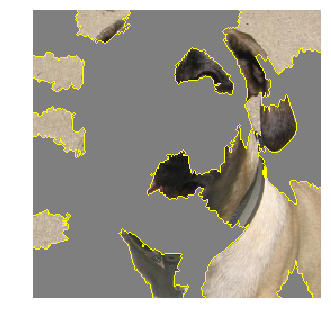

In [51]:
ShowImageNoAxis(image * mask_new, mask.astype(bool))

In [26]:
segments

array([[ 4,  4,  4, ...,  2,  2,  2],
       [ 4,  4,  4, ...,  2,  2,  2],
       [ 4,  4,  4, ...,  2,  2,  2],
       ...,
       [37, 37, 37, ..., 34, 34, 34],
       [37, 37, 37, ..., 34, 34, 34],
       [37, 37, 37, ..., 34, 34, 34]])